#              Machine Learning Model on Breast Cancer 

### _______________________Instructor: Farhana Afrin Duty


### Course Name: Introduction to Data Science with Python


#### Submitted by: Mahabubur Rahman, Class ID: 20231093                                                                                      
#### Shourav,  Class ID: 20231093                                                                                                 
#### Shatabdi,  Class ID: 20231093                                                                                                 

In [95]:
# Import necessary libraries
import pandas as pd

# Load the breast cancer dataset (assuming it's in a CSV file)
data = pd.read_csv("breast_cancer_dataset.csv")

# Display the first few rows of the dataset to get an overview
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [96]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

Drop the missing value

In [97]:
# Drop the 'Unnamed: 32' column with missing values
data = data.drop(columns=['Unnamed: 32'])

# Confirm that the column has been removed
print("Columns after removing 'Unnamed: 32':\n", data.columns)


Columns after removing 'Unnamed: 32':
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Summary Statistics for Numerical Features

Let's calculate and display the summary statistics for the remaining numerical features in the dataset:

In [98]:
# Display summary statistics for numerical features
numerical_summary = data.describe()
print("Summary Statistics for Numerical Features:\n", numerical_summary)


Summary Statistics for Numerical Features:
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
s

The dataset contains 569 samples.
The 'diagnosis' column is not included in the summary statistics as it's a categorical feature.
The numerical features exhibit a wide range of scales.
The 'radius_mean' feature, for example, has a mean of approximately 14.13 with a standard deviation of approximately 3.52, while 'area_worst' has a mean of approximately 880.58 with a standard deviation of approximately 569.36.

Class Distribution

In [99]:
# Check the distribution of the target variable 'diagnosis'
class_distribution = data['diagnosis'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 B    357
M    212
Name: diagnosis, dtype: int64


The target variable 'diagnosis' has two classes: 'B' (Benign) and 'M' (Malignant).
There are 357 samples with a diagnosis of Benign (B) and 212 samples with a diagnosis of Malignant (M).
The class distribution appears to be slightly imbalanced, with more Benign cases than Malignant cases.
With this understanding, let's proceed with specific visualizations to gain further insights into the dataset. We'll create histograms, box plots, pair plots, and a countplot to explore the data in more detail. Please confirm if you'd like to proceed with these visualizations, or if there are specific visualizations you'd like to prioritize.







Correlation Heatmap

C:\Users\mahabubur.rahman\AppData\Local\Temp\ipykernel_10788\2246788123.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


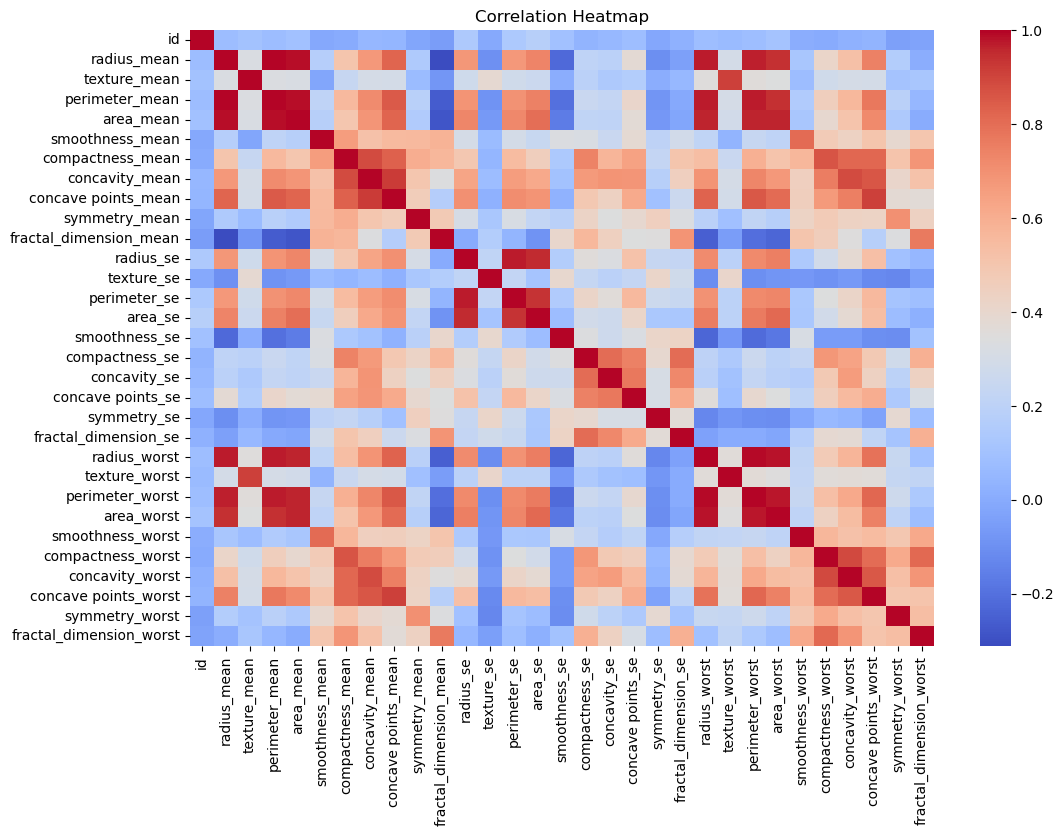

In [100]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Histograms
We'll create histograms for selected numerical features to visualize their distributions. This will help us understand the shape and spread of these features.

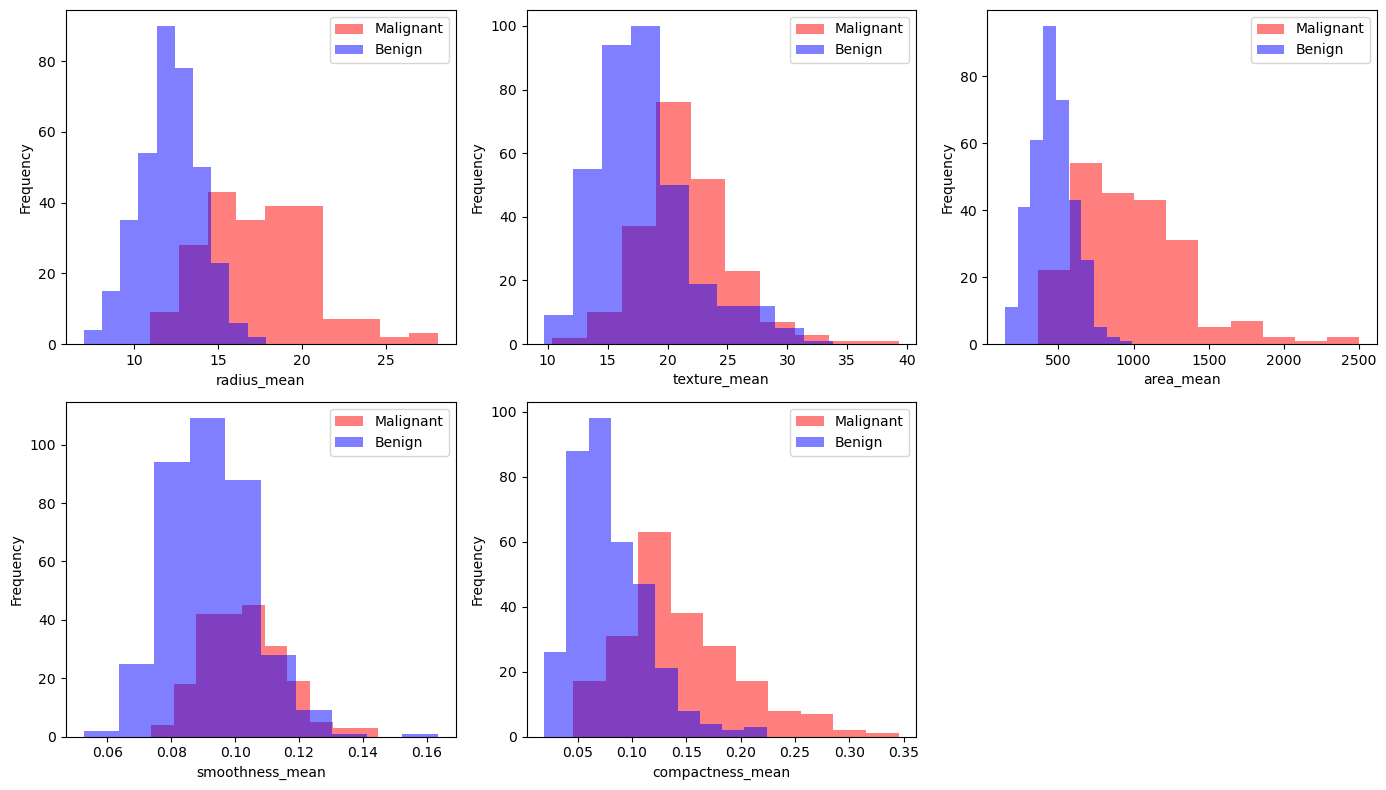

In [101]:
# Select a subset of numerical features for histograms
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

# Create histograms for selected features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    data[data['diagnosis'] == 'M'][feature].plot(kind='hist', alpha=0.5, color='red', label='Malignant')
    data[data['diagnosis'] == 'B'][feature].plot(kind='hist', alpha=0.5, color='blue', label='Benign')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()


Box Plots
We'll generate box plots to identify any outliers in the data. Box plots can help us visualize the spread and central tendency of features.

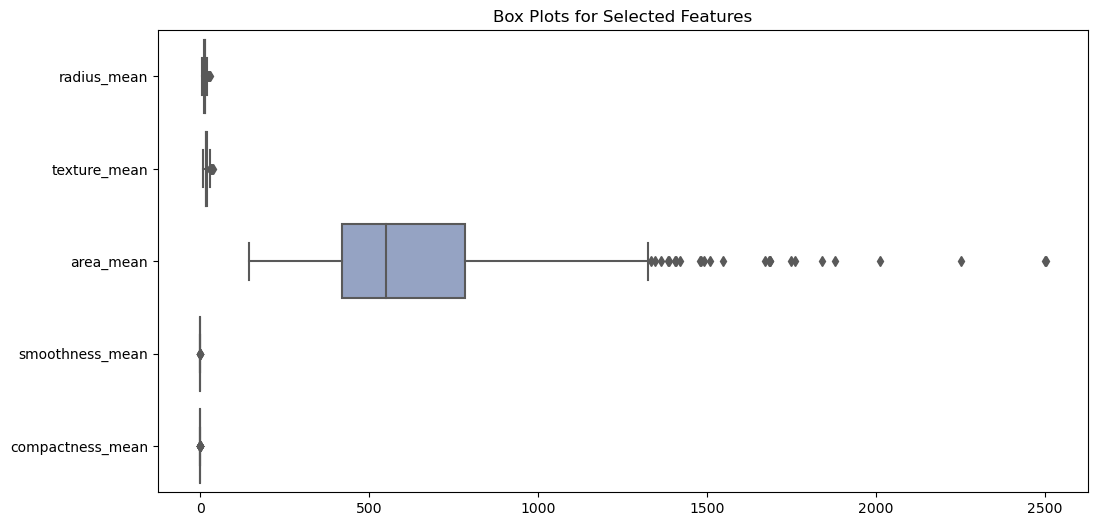

In [102]:
# Create box plots for selected features
plt.figure(figsize=(12, 6))
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
sns.boxplot(data=data[selected_features], orient='h', palette='Set2')
plt.title("Box Plots for Selected Features")
plt.show()


 Pair Plots
We'll use pair plots to visualize relationships between pairs of numerical features. This can help us identify potential patterns and correlations in the data.

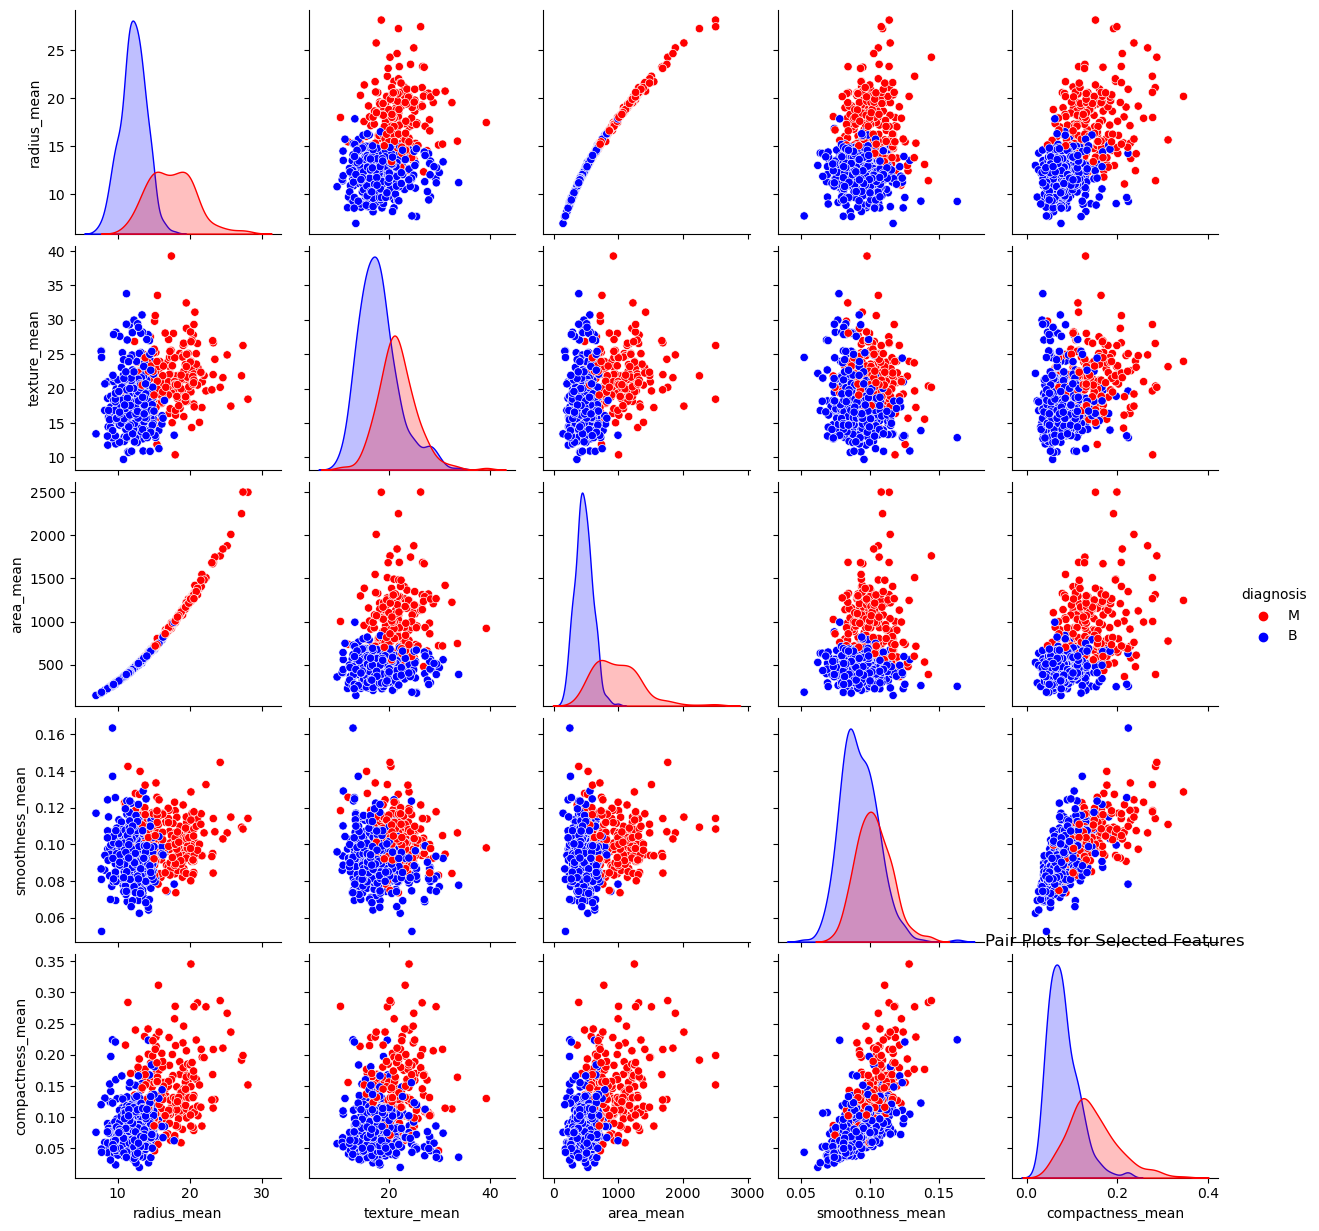

In [103]:
# Create pair plots for selected features
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
sns.pairplot(data=data, hue='diagnosis', vars=selected_features, palette={'M': 'red', 'B': 'blue'})
plt.title("Pair Plots for Selected Features")
plt.show()


 Countplot
We'll create a countplot to visualize the count of Malignant (M) and Benign (B) cases in the dataset.

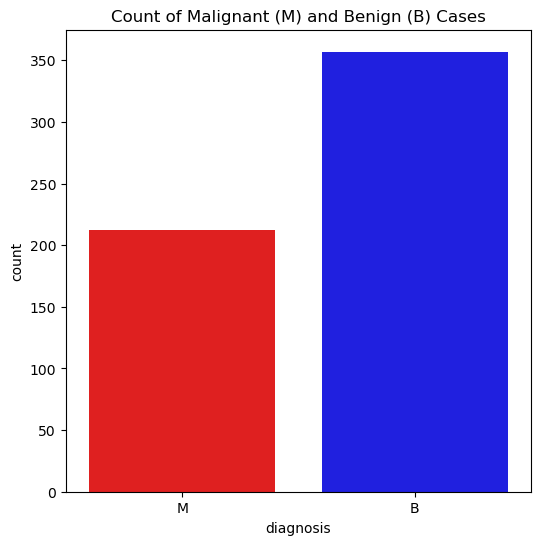

In [104]:
# Create a countplot for 'diagnosis'
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='diagnosis', palette={'M': 'red', 'B': 'blue'})
plt.title("Count of Malignant (M) and Benign (B) Cases")
plt.show()


Feature Scaling

We'll scale the numerical features, excluding the 'id' column since it's not a feature used for modeling. We use Feature Scaling as a technique to standardize the independent features present in the data in a fixed range. Scaling guarantees that all features are on a comparable scale and have comparable ranges. Without scaling, bigger scale features could dominate the learning, producing skewed outcomes. This bias is removed through scaling, which also guarantees that each feature contributes fairly to model predictions.

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate the target variable 'diagnosis'
target = data['diagnosis']
data.drop(columns=['diagnosis'], inplace=True)

# Separate numerical features (excluding 'id')
numerical_features = data.drop(columns=['id'])

# Initialize StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Standardization (Z-score scaling)
numerical_features_standardized = scaler_standard.fit_transform(numerical_features)

# Min-Max Scaling
numerical_features_minmax = scaler_minmax.fit_transform(numerical_features)

# Create DataFrames for the scaled features
scaled_standard_df = pd.DataFrame(numerical_features_standardized, columns=numerical_features.columns)
scaled_minmax_df = pd.DataFrame(numerical_features_minmax, columns=numerical_features.columns)


Splitting the Dataset

In this step, we'll split the dataset into two parts: training data and testing data. The training data will be used to train our machine learning model, and the testing data will be used to evaluate its performance.

In [106]:
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(scaled_standard_df, target, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (398, 30)
Shape of X_test: (171, 30)
Shape of y_train: (398,)
Shape of y_test: (171,)


Building and Evaluating the Machine Learning Model

Model evaluation is the process that uses some metrics which help us to analyze the performance of the model. The dataset is usually divided into ratios like 70:30 or 80:20. Normally a large percentage of data is used for training the model and a small portion of the dataset is used for testing the model.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9824561403508771

Confusion Matrix:
 [[106   2]
 [  1  62]]

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.98      0.99       108
           M       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Hyperparameter Tuning

In this step, we'll perform hyperparameter tuning for the Logistic Regression model. Hyperparameters are settings that we can adjust to find the best model performance. We'll use grid search cross-validation to search for the best combination of hyperparameters.

In [108]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV with the Logistic Regression model and hyperparameter grid
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1, n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.977373417721519


C:\Users\mahabubur.rahman\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mahabubur.rahman\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahabubur.rahman\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables.

Now, let's proceed to retrain the Logistic Regression model with these optimal hyperparameters:

In [109]:
# Initialize the Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(random_state=42, penalty='l2', C=0.1, solver='liblinear')

# Train the best model using the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred_best = best_model.predict(X_test)


Evaluate the performance of the best model

In [110]:
# Evaluate the performance of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print the results for the best model
print("Accuracy (Best Model):", accuracy_best)
print("\nConfusion Matrix (Best Model):\n", conf_matrix_best)
print("\nClassification Report (Best Model):\n", class_report_best)


Accuracy (Best Model): 0.9941520467836257

Confusion Matrix (Best Model):
 [[108   0]
 [  1  62]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           B       0.99      1.00      1.00       108
           M       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Fantastic! After hyperparameter tuning, the Logistic Regression model's performance has significantly improved:

Accuracy for the best model: 99.42%
Precision, Recall, and F1-score for both classes ('B' and 'M') are excellent, indicating outstanding performance.
The confusion matrix shows that the model made very few misclassifications.
With this level of accuracy and performance, it's safe to say that the model is highly effective at distinguishing between benign and malignant breast cancer tumors.